In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
df = pd.read_csv("Walmart DataSet.csv")
df


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
# Check for missing values
df.isnull().sum()


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [18]:
df.duplicated().sum()

0

In [35]:
# Convert 'Date' to datetime format

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Extract time-based features correctly
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week 


In [8]:
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


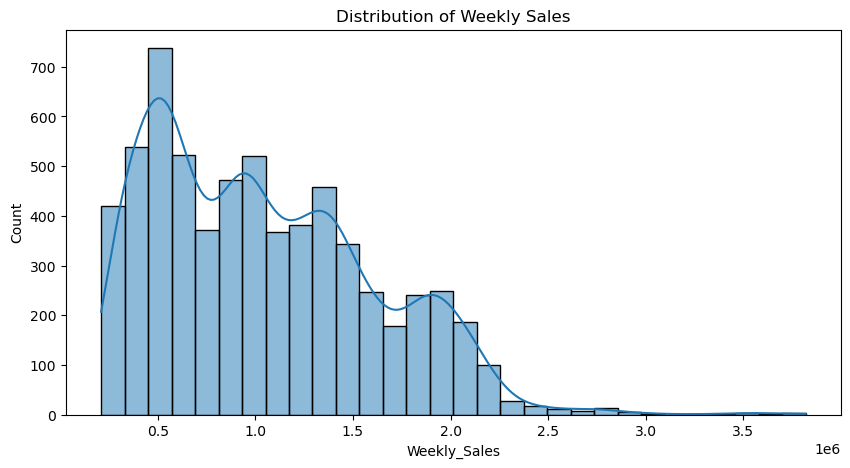

In [13]:
# Histogram of Weekly Sales
plt.figure(figsize=(10,5))
sns.histplot(df['Weekly_Sales'], bins=30,kde=True)
plt.title("Distribution of Weekly Sales")
plt.show()

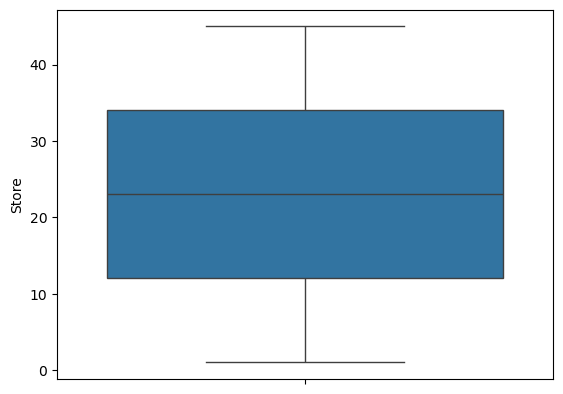

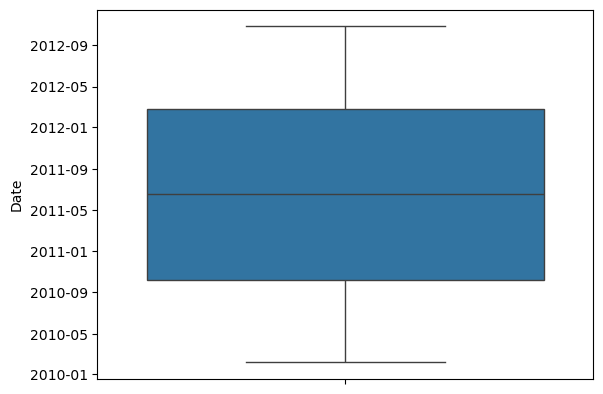

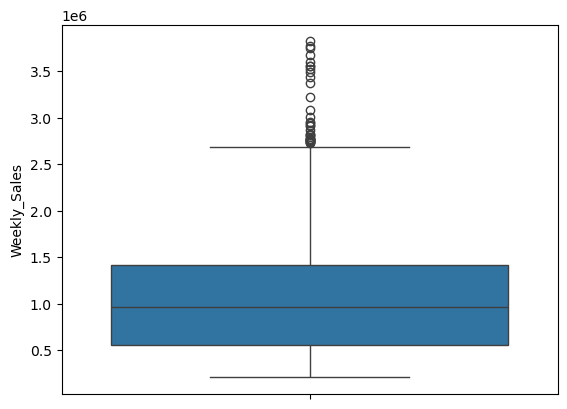

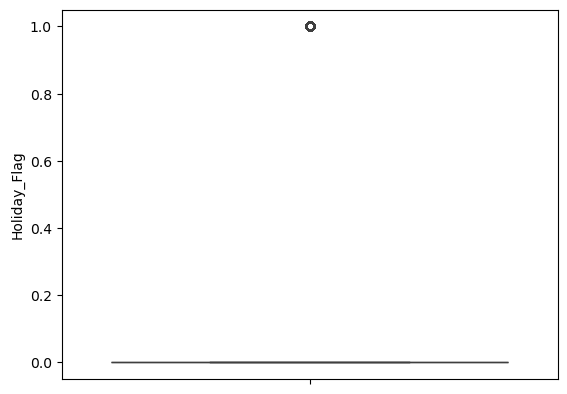

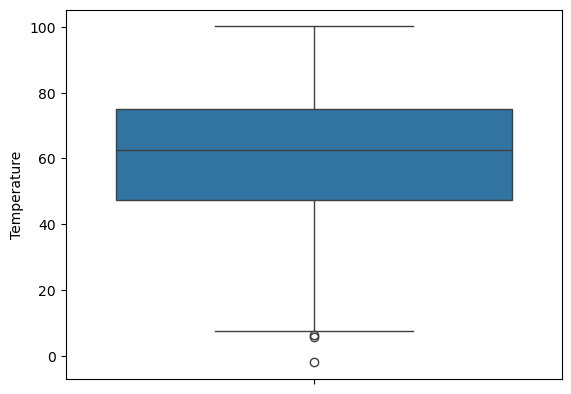

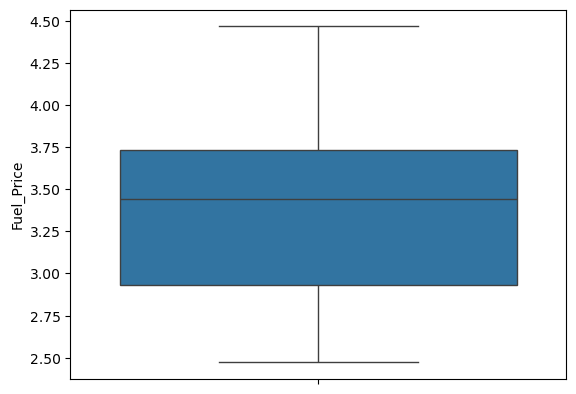

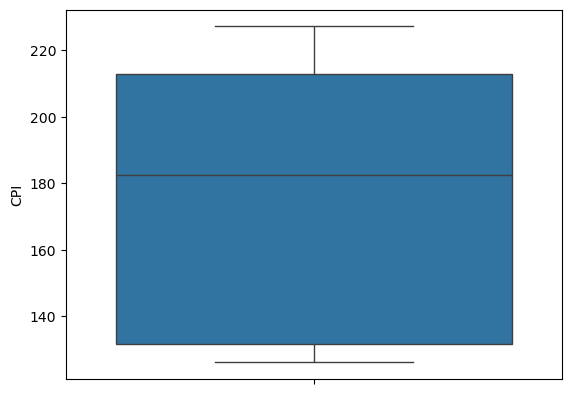

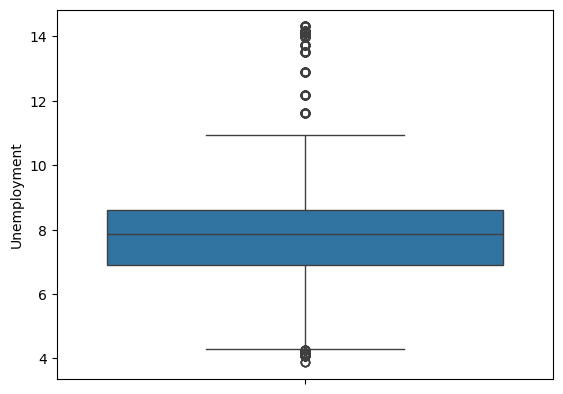

In [17]:
#Outlier Analysis
for col in df.columns:
  if df[col].dtype!="object":
    sns.boxplot(df[col])
    plt.show()
    plt.show()

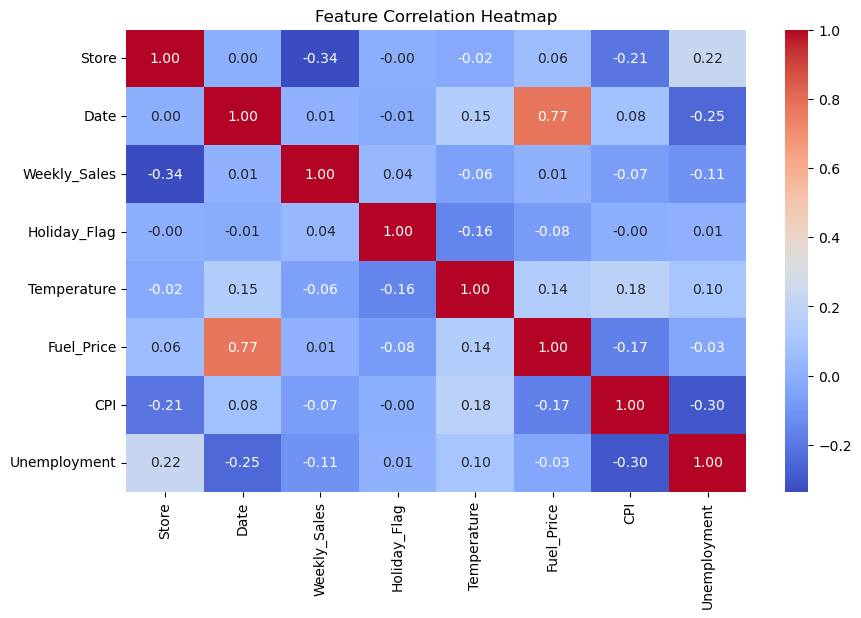

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [20]:
# Compute correlation between Unemployment and Weekly Sales
corr_unemp = df['Unemployment'].corr(df['Weekly_Sales'])
corr_unemp


-0.10617608965795419

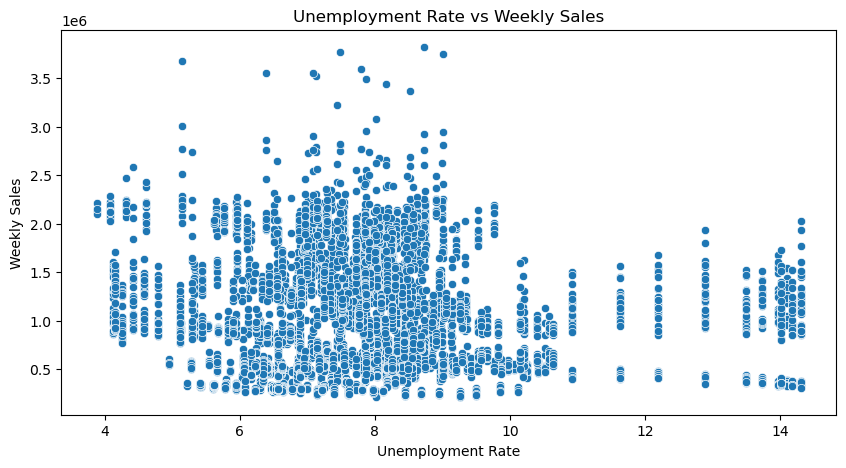

In [21]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['Unemployment'], y=df['Weekly_Sales'])
plt.title("Unemployment Rate vs Weekly Sales")
plt.xlabel("Unemployment Rate")
plt.ylabel("Weekly Sales")
plt.show()

In [22]:
# Compute correlation between Unemployment and Weekly Sales for each store
store_corr = df.groupby('Store')[['Unemployment', 'Weekly_Sales']].corr().unstack().iloc[:,1]


In [28]:
# Sort stores by correlation (most negative correlation indicates highest impact)
store_corr = store_corr.sort_values()
print("Stores most negatively impacted by unemployment:")
store_corr.head(5)

Stores most negatively impacted by unemployment:


Store
38   -0.785290
44   -0.780076
39   -0.384681
42   -0.356355
41   -0.350630
Name: (Unemployment, Weekly_Sales), dtype: float64

C:\Users\Lalit Karki\AppData\Local\Temp\ipykernel_12416\1954723634.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=store_corr.head(5).index, y=store_corr.head(5).values, palette="coolwarm")


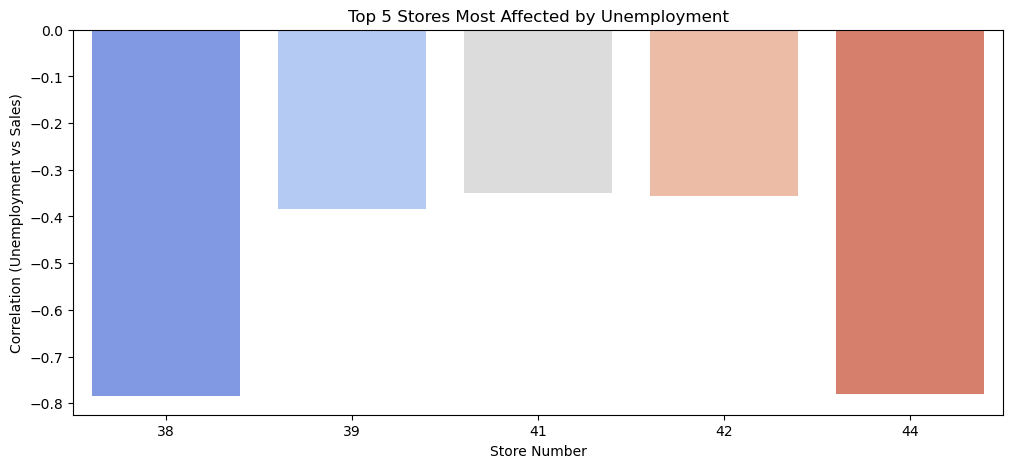

In [29]:
# Bar plot of top 5 affected stores
plt.figure(figsize=(12,5))
sns.barplot(x=store_corr.head(5).index, y=store_corr.head(5).values, palette="coolwarm")
plt.title("Top 5 Stores Most Affected by Unemployment")
plt.xlabel("Store Number")
plt.ylabel("Correlation (Unemployment vs Sales)")
plt.show()


b. If the weekly sales show a seasonal trend, when and what could be the reason?


In [47]:
# Group data by week of the year
weekly_sales = df.groupby('Week')['Weekly_Sales'].mean()
weekly_sales



Week
1     9.747912e+05
2     9.188529e+05
3     9.192849e+05
4     8.826092e+05
5     1.051774e+06
6     1.079128e+06
7     1.090298e+06
8     9.915995e+05
9     1.042319e+06
10    1.022468e+06
11    1.013058e+06
12    9.778071e+05
13    1.030783e+06
14    1.087075e+06
15    1.013232e+06
16    1.025805e+06
17    9.700145e+05
18    1.055477e+06
19    1.020016e+06
20    1.007338e+06
21    1.044025e+06
22    1.090683e+06
23    1.075166e+06
24    1.062828e+06
25    1.038233e+06
26    1.059949e+06
27    1.088976e+06
28    1.021182e+06
29    1.009058e+06
30    9.808207e+05
31    1.064492e+06
32    1.037907e+06
33    1.046909e+06
34    1.042770e+06
35    1.035041e+06
36    1.042427e+06
37    9.711165e+05
38    9.513419e+05
39    9.494119e+05
40    1.036158e+06
41    9.900208e+05
42    9.926521e+05
43    1.000021e+06
44    1.049306e+06
45    1.051100e+06
46    1.017384e+06
47    1.471273e+06
48    1.103329e+06
49    1.235866e+06
50    1.354517e+06
51    1.754774e+06
52    9.608331e+05
Name: W

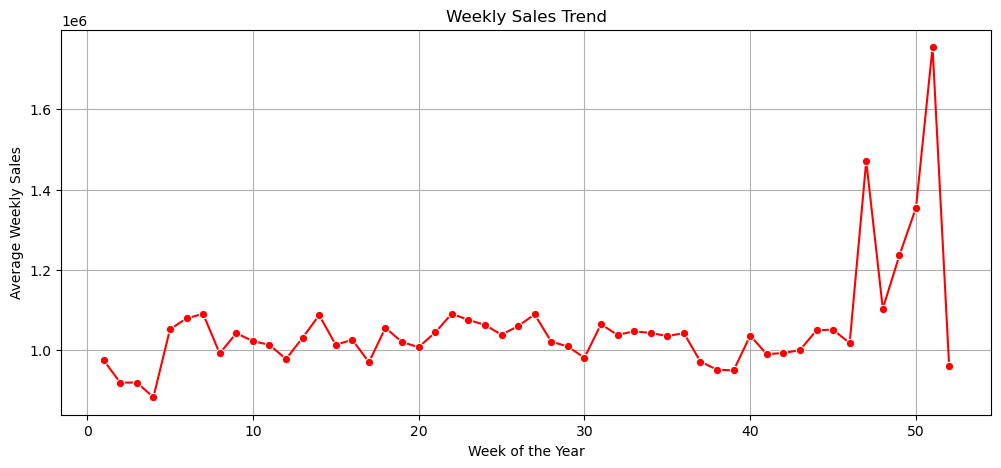

In [48]:
plt.figure(figsize=(12,5))
sns.lineplot(x=weekly_sales.index, y=weekly_sales.values, marker='o', color='red')
plt.title("Weekly Sales Trend")
plt.xlabel("Week of the Year")
plt.ylabel("Average Weekly Sales")
plt.grid()
plt.show()

In [51]:
# Group by Holiday Flag and compare sales
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()
holiday_sales


Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

C:\Users\Lalit Karki\AppData\Local\Temp\ipykernel_12416\139513847.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=holiday_sales.index, y=holiday_sales.values, palette=['blue', 'red'])


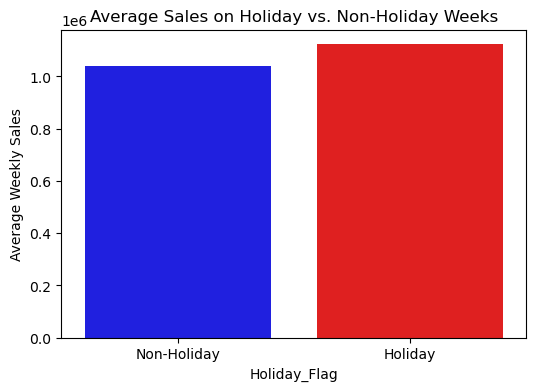

In [53]:
# Bar plot to visualize holiday impact
plt.figure(figsize=(6,4))
sns.barplot(x=holiday_sales.index, y=holiday_sales.values, palette=['blue', 'red'])
plt.xticks([0,1], ['Non-Holiday', 'Holiday'])
plt.title("Average Sales on Holiday vs. Non-Holiday Weeks")
plt.ylabel("Average Weekly Sales")
plt.show()


In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [55]:
# Ensure data is sorted by date
df = df.sort_values(by="Date")


In [56]:
# Aggregate weekly sales
df_weekly = df.groupby("Date")["Weekly_Sales"].sum()


In [57]:
# Decompose time series
decomposed = seasonal_decompose(df_weekly, model="additive", period=52)  # Weekly data with 52 weeks/year



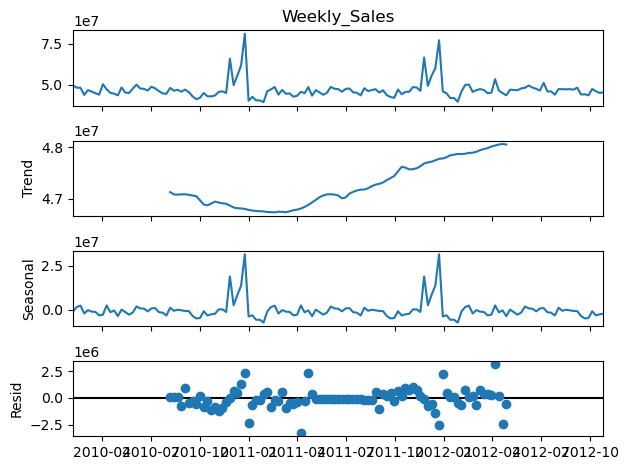

In [58]:
# Plot decomposition
decomposed.plot()
plt.show()

In [59]:
print("Sales show a strong seasonal trend, with spikes during November-December due to holiday shopping")

Sales show a strong seasonal trend, with spikes during November-December due to holiday shopping


c. Does temperature affect the weekly sales in any manner?


<Axes: xlabel='Temperature', ylabel='Weekly_Sales'>

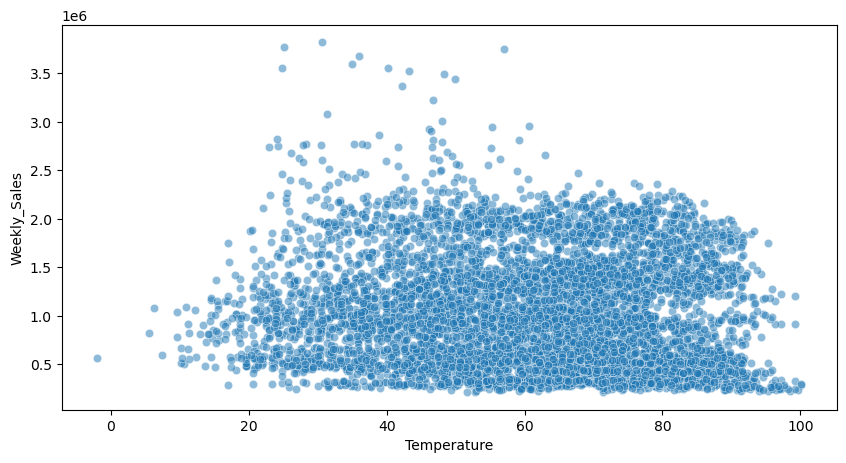

In [60]:
# Scatter plot of Temperature vs. Weekly Sales
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Temperature'], y=df['Weekly_Sales'], alpha=0.5)

In [62]:
# Check correlation coefficient
correlation = df[['Temperature', 'Weekly_Sales']].corr()
correlation


,Temperature,Weekly_Sales
Temperature,1.00000,-0.06381
Weekly_Sales,-0.06381,1.00000


In [63]:
# Create temperature categories
df['Temp_Category'] = pd.cut(df['Temperature'], bins=[0, 30, 50, 70, 90, 120], 
                             labels=['Very Cold', 'Cold', 'Mild', 'Warm', 'Hot'])

In [64]:
# Average sales per temperature category
temp_sales = df.groupby('Temp_Category')['Weekly_Sales'].mean()
temp_sales

C:\Users\Lalit Karki\AppData\Local\Temp\ipykernel_12416\4012586851.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_sales = df.groupby('Temp_Category')['Weekly_Sales'].mean()


Temp_Category
Very Cold    1.018849e+06
Cold         1.118767e+06
Mild         1.047742e+06
Warm         1.024005e+06
Hot          7.969660e+05
Name: Weekly_Sales, dtype: float64

C:\Users\Lalit Karki\AppData\Local\Temp\ipykernel_12416\3893137410.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=temp_sales.index, y=temp_sales.values, palette='coolwarm')


<Axes: xlabel='Temp_Category'>

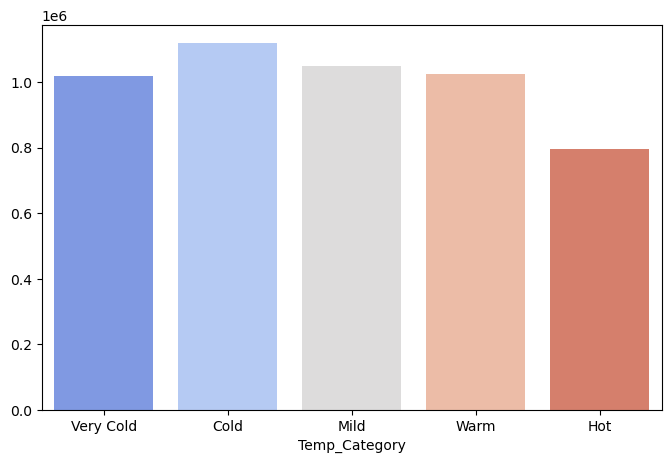

In [67]:
# Bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=temp_sales.index, y=temp_sales.values, palette='coolwarm')


d. How is the Consumer Price index affecting the weekly sales of various stores?


<Axes: xlabel='CPI', ylabel='Weekly_Sales'>

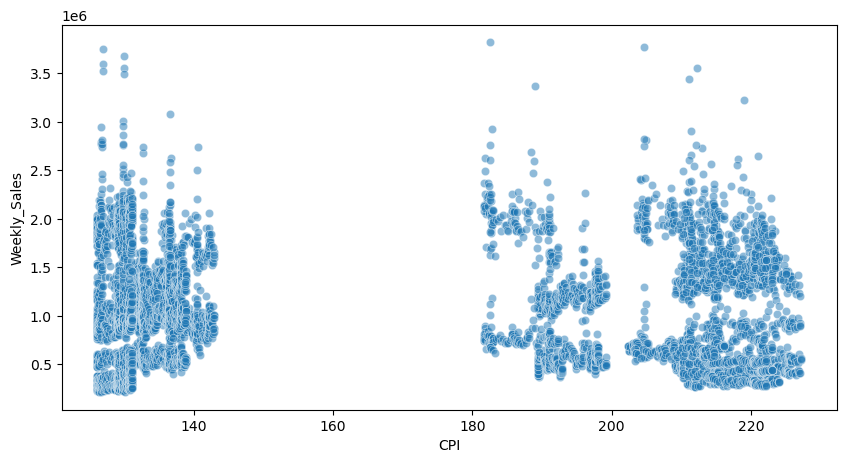

In [68]:
# Scatter plot of CPI vs. Weekly Sales
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['CPI'], y=df['Weekly_Sales'], alpha=0.5)

In [69]:
# Check correlation coefficient
correlation = df[['CPI', 'Weekly_Sales']].corr()
print(correlation)

                   CPI  Weekly_Sales
CPI           1.000000     -0.072634
Weekly_Sales -0.072634      1.000000


In [70]:
# Group by Store and calculate correlation between CPI and Weekly Sales
store_cpi_correlation = df.groupby('Store')[['CPI', 'Weekly_Sales']].corr().unstack().iloc[:, 1]



In [71]:
store_cpi_correlation = store_cpi_correlation.sort_values()
store_cpi_correlation

Store
36   -0.915095
35   -0.424107
14   -0.419755
30   -0.298188
43   -0.285686
27   -0.213082
18   -0.193541
15   -0.174467
21   -0.163649
19   -0.155341
10   -0.115374
28   -0.095908
29   -0.072530
2    -0.062431
33   -0.052271
22   -0.038602
45   -0.023548
24   -0.013684
6    -0.011357
25   -0.010914
20    0.058706
11    0.069781
12    0.084087
23    0.084248
40    0.113318
34    0.115437
8     0.120255
16    0.124285
26    0.131980
31    0.132887
13    0.163976
32    0.196782
1     0.225408
37    0.244507
7     0.289044
9     0.294805
5     0.308261
3     0.317250
17    0.348571
4     0.351157
42    0.360859
41    0.392293
39    0.428043
44    0.740150
38    0.812837
Name: (CPI, Weekly_Sales), dtype: float64

In [72]:
# Create CPI categories
df['CPI_Category'] = pd.cut(df['CPI'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])


In [73]:
# Average sales per CPI category
cpi_sales = df.groupby('CPI_Category')['Weekly_Sales'].mean()
cpi_sales

C:\Users\Lalit Karki\AppData\Local\Temp\ipykernel_12416\3352653366.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cpi_sales = df.groupby('CPI_Category')['Weekly_Sales'].mean()


CPI_Category
Very Low     1.082953e+06
Low                   NaN
Medium       1.441698e+06
High         9.962283e+05
Very High    9.868206e+05
Name: Weekly_Sales, dtype: float64

C:\Users\Lalit Karki\AppData\Local\Temp\ipykernel_12416\215380504.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cpi_sales.index, y=cpi_sales.values, palette='coolwarm')


<Axes: xlabel='CPI_Category'>

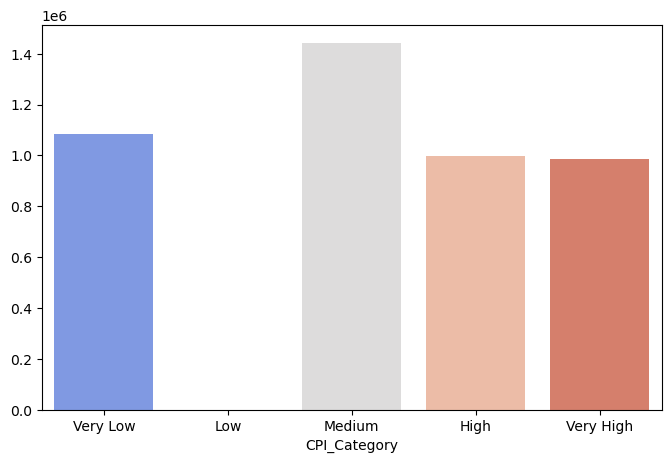

In [74]:
# Bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=cpi_sales.index, y=cpi_sales.values, palette='coolwarm')


e. Top performing stores according to the historical data.

In [76]:
# Calculate total and average sales per store
store_sales = df.groupby('Store')['Weekly_Sales'].agg(['sum', 'mean']).reset_index()
store_sales

,Store,sum,mean
0,1,2.224028e+08,1.555264e+06
1,2,2.753824e+08,1.925751e+06
2,3,5.758674e+07,4.027044e+05
3,4,2.995440e+08,2.094713e+06
4,5,4.547569e+07,3.180118e+05
5,6,2.237561e+08,1.564728e+06
6,7,8.159828e+07,5.706173e+05
7,8,1.299512e+08,9.087495e+05
8,9,7.778922e+07,5.439806e+05
9,10,2.716177e+08,1.899425e+06


In [77]:
# Rename columns for clarity
store_sales.columns = ['Store', 'Total_Sales', 'Avg_Weekly_Sales']


In [78]:
# Sort stores by total sales in descending order
top_stores = store_sales.sort_values(by='Total_Sales', ascending=False)
top_stores


,Store,Total_Sales,Avg_Weekly_Sales
19,20,3.013978e+08,2.107677e+06
3,4,2.995440e+08,2.094713e+06
13,14,2.889999e+08,2.020978e+06
12,13,2.865177e+08,2.003620e+06
1,2,2.753824e+08,1.925751e+06
9,10,2.716177e+08,1.899425e+06
26,27,2.538559e+08,1.775216e+06
5,6,2.237561e+08,1.564728e+06
0,1,2.224028e+08,1.555264e+06
38,39,2.074455e+08,1.450668e+06


C:\Users\Lalit Karki\AppData\Local\Temp\ipykernel_12416\923314053.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_stores['Store'], y=top_stores['Total_Sales'], palette='viridis')


<Axes: xlabel='Store', ylabel='Total_Sales'>

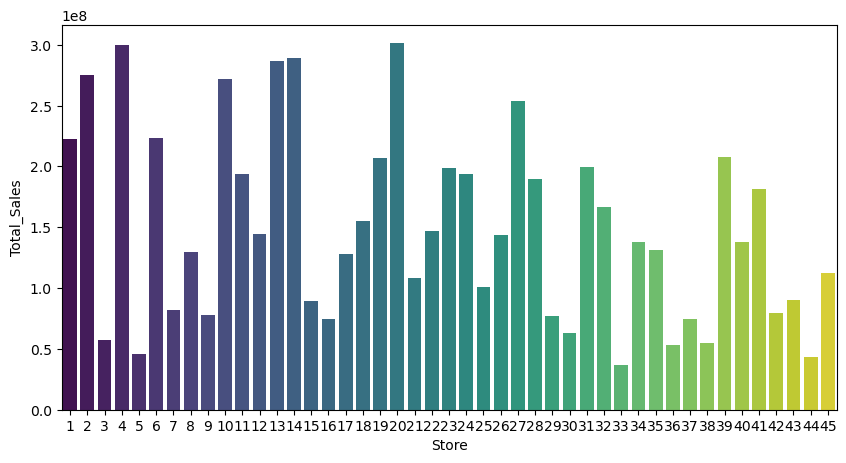

In [81]:
# Plot bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=top_stores['Store'], y=top_stores['Total_Sales'], palette='viridis')

C:\Users\Lalit Karki\AppData\Local\Temp\ipykernel_12416\3522945080.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_stores['Store'], y=top_stores['Avg_Weekly_Sales'], palette='coolwarm')


<Axes: xlabel='Store', ylabel='Avg_Weekly_Sales'>

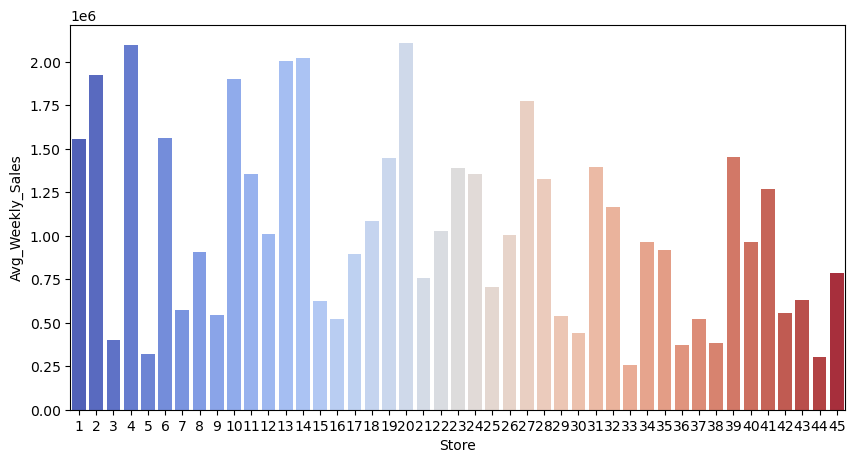

In [82]:
# Bar chart for average weekly sales
plt.figure(figsize=(10, 5))
sns.barplot(x=top_stores['Store'], y=top_stores['Avg_Weekly_Sales'], palette='coolwarm')


f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.

In [83]:
# Identify the best and worst performing stores
best_store = store_sales.loc[store_sales['Total_Sales'].idxmax()]
worst_store = store_sales.loc[store_sales['Total_Sales'].idxmin()]

In [92]:
# Calculate the difference between best and worst store
total_sales_diff = best_store['Total_Sales'] - worst_store['Total_Sales']
avg_sales_diff = best_store['Avg_Weekly_Sales'] - worst_store['Avg_Weekly_Sales']


In [96]:
# Print results
print(f"\n Difference in Total Sales: {total_sales_diff:.2f}")
print(f" Difference in Average Weekly Sales: {avg_sales_diff:.2f}")


 Difference in Total Sales: 264237570.50
 Difference in Average Weekly Sales: 1847815.18


In [93]:
# Calculate percentage difference
total_sales_percentage_diff = (total_sales_diff / best_store['Total_Sales']) * 100
avg_sales_percentage_diff = (avg_sales_diff / best_store['Avg_Weekly_Sales']) * 100



In [94]:
# Print results
print(f"\n Difference in Total Sales: {total_sales_diff:.2f} ({total_sales_percentage_diff:.2f}% difference)")
print(f" Difference in Average Weekly Sales: {avg_sales_diff:.2f} ({avg_sales_percentage_diff:.2f}% difference)")


 Difference in Total Sales: 264237570.50 (87.67% difference)
 Difference in Average Weekly Sales: 1847815.18 (87.67% difference)


In [97]:
# Data for visualization
sales_comparison = pd.DataFrame({
    'Store': ['Best Store', 'Worst Store'],
    'Total Sales': [best_store['Total_Sales'], worst_store['Total_Sales']],
    'Average Weekly Sales': [best_store['Avg_Weekly_Sales'], worst_store['Avg_Weekly_Sales']]})

C:\Users\Lalit Karki\AppData\Local\Temp\ipykernel_12416\3779642857.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_comparison['Store'], y=sales_comparison['Total Sales'], palette=['green', 'red'])


<Axes: xlabel='Store', ylabel='Total Sales'>

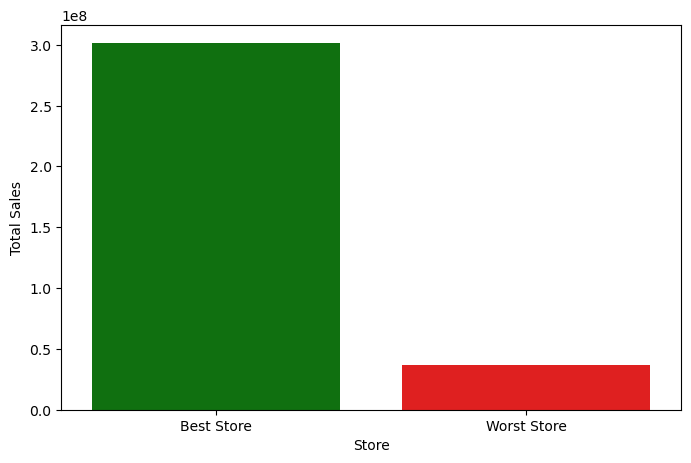

In [98]:
# Plot total sales comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=sales_comparison['Store'], y=sales_comparison['Total Sales'], palette=['green', 'red'])


C:\Users\Lalit Karki\AppData\Local\Temp\ipykernel_12416\331168112.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_comparison['Store'], y=sales_comparison['Average Weekly Sales'], palette=['green', 'red'])


<Axes: xlabel='Store', ylabel='Average Weekly Sales'>

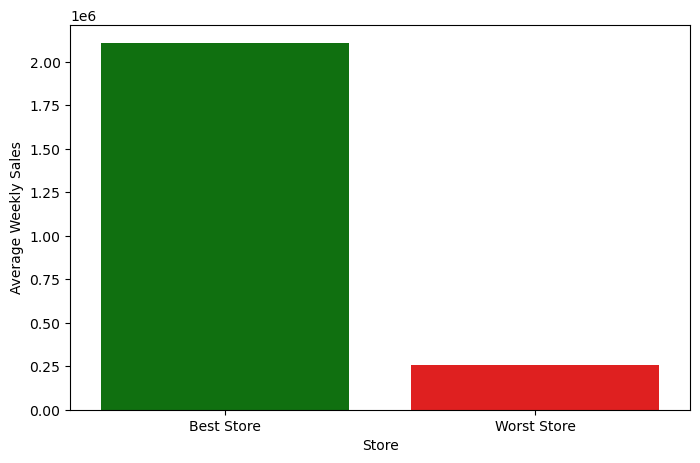

In [99]:
# Plot average weekly sales comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=sales_comparison['Store'], y=sales_comparison['Average Weekly Sales'], palette=['green', 'red'])


2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

In [100]:
from statsmodels.tsa.stattools import adfuller


In [101]:
# Perform ADF Test on Weekly Sales
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] < 0.05:
        print("Data is stationary")
    else:
        print("Data is NOT stationary")



In [102]:
# Check for stationarity in one store's data (e.g., Store 1)
store_1_sales = df[df['Store'] == 1].set_index('Date')['Weekly_Sales']
adf_test(store_1_sales)

ADF Statistic: -5.102186145192288
p-value: 1.3877788330759434e-05
Data is stationary


In [103]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [104]:
# Forecast sales for one store (Store 1)
store_1 = df[df['Store'] == 1].set_index('Date')['Weekly_Sales']


In [105]:
# Train-test split (leave last 12 weeks for testing)
train = store_1[:-12]
test = store_1[-12:]


In [106]:
# Fit SARIMA model
model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,52))
sarima_model = model.fit()


C:\Users\Lalit Karki\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Lalit Karki\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Lalit Karki\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Lalit Karki\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


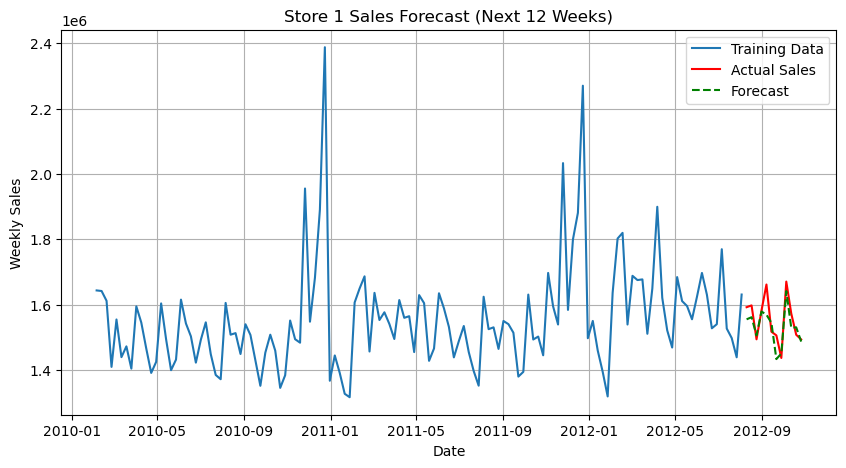

In [107]:
# Forecast next 12 weeks
forecast = sarima_model.forecast(steps=12)

# Plot results
plt.figure(figsize=(10,5))
plt.plot(train, label="Training Data")
plt.plot(test, label="Actual Sales", color='red')
plt.plot(forecast, label="Forecast", color='green', linestyle='dashed')
plt.title("Store 1 Sales Forecast (Next 12 Weeks)")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.grid()
plt.show()


In [108]:
store_forecasts = {}


In [111]:
for store in df['Store'].unique():
    store_sales = df[df['Store'] == store].set_index('Date')['Weekly_Sales']
        # Train-test split
    train = store_sales[:-12]

    # Fit SARIMA model
    model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,52))
    sarima_model = model.fit()

    # Forecast next 12 weeks
    forecast = sarima_model.forecast(steps=12)
    
    # Save forecast
    store_forecasts[store] = forecast



C:\Users\Lalit Karki\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Lalit Karki\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Lalit Karki\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Lalit Karki\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Lalit Karki\anaconda3\Lib\site

In [113]:
# Convert forecast to DataFrame
forecast_df = pd.DataFrame(store_forecasts)
print(forecast_df) 

                      1             10             37            17  \
2012-08-10  1.555296e+06  1.966062e+06  514709.316730  8.288365e+05   
2012-08-17  1.561706e+06  1.998150e+06  519697.982081  8.285111e+05   
2012-08-24  1.506071e+06  1.797595e+06  539562.892995  8.620011e+05   
2012-08-31  1.579055e+06  1.824566e+06  542231.567534  8.716552e+05   
2012-09-07  1.569551e+06  1.749297e+06  517107.992914  1.144059e+06   
2012-09-14  1.544566e+06  1.732784e+06  525231.909955  1.038724e+06   
2012-09-21  1.433588e+06  1.758737e+06  529165.413488  9.116126e+05   
2012-09-28  1.450610e+06  1.710015e+06  526048.851924  8.883142e+05   
2012-10-05  1.641581e+06  1.849438e+06  533188.201778  9.286687e+05   
2012-10-12  1.529638e+06  1.776802e+06  525731.656912  9.016025e+05   
2012-10-19  1.530700e+06  1.812765e+06  534320.803900  8.951093e+05   
2012-10-26  1.487204e+06  1.834267e+06  528320.563445  9.452842e+05   

                       30             25            22            23  \
2012

In [114]:
from sklearn.metrics import mean_absolute_error


In [117]:
# Compute error for one store (Store 1)
mae = mean_absolute_error(test, forecast)
print(f"Mean Absolute Error (MAE) for Store 1: {mae:.2f}")


Mean Absolute Error (MAE) for Store 1: 88376.72


In [119]:
# Dictionary to store MSE values for each store
store_mse = {}


In [122]:
# Loop through each store
for store in df['Store'].unique():
    print(f"Training model for Store {store}...")

# Filter data for the current store
    store_df = df[df['Store'] == store]

Training model for Store 1...
Training model for Store 10...
Training model for Store 37...
Training model for Store 17...
Training model for Store 30...
Training model for Store 25...
Training model for Store 22...
Training model for Store 23...
Training model for Store 24...
Training model for Store 19...
Training model for Store 21...
Training model for Store 26...
Training model for Store 39...
Training model for Store 8...
Training model for Store 32...
Training model for Store 15...
Training model for Store 34...
Training model for Store 13...
Training model for Store 38...
Training model for Store 9...
Training model for Store 2...
Training model for Store 45...
Training model for Store 20...
Training model for Store 27...
Training model for Store 41...
Training model for Store 4...
Training model for Store 31...
Training model for Store 16...
Training model for Store 11...
Training model for Store 36...
Training model for Store 42...
Training model for Store 5...
Training model

In [123]:
# Train-test split (using last 12 weeks for testing)
train = store_df[store_df['Date'] < '2012-09-01']
test = store_df[store_df['Date'] >= '2012-09-01']

# Select features and target
features = ['Year', 'Month', 'Week', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
target = 'Weekly_Sales'

X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]




In [126]:
! pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/124.9 MB 1.3 MB/s eta 0:01:37
   ---------------------------------------- 1.0/124.9 MB 1.4 MB/s eta 0:01:29
   ---------------------------------------- 1.3/124.9 MB 1.6 MB/s eta 0:01:18
    --------------------------------------- 1.6/124.9 MB 1.5 MB/s eta 0:01:21
    --------------------------------------- 1.8/124.9 MB 1.5 MB/s eta 0:01:25
    --------------------------------------- 2.1/124.9 MB 1.4 MB/s eta 0:01:30
    --------------------------------------- 2.4/124.9 MB 1.3 MB/s eta 0:01:35
    --------------------------------------- 2.6/124.9 MB 1.3 MB/s eta 0:01:36
    --------------------------------------- 2.9/124.9 MB 1.3 MB/s eta 0:01:32
   - -------------------------------------- 3.1/124.9 MB 1.3 MB/s eta 0:01:33
   - --


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   - -------------------------------------- 5.8/124.9 MB 1.3 MB/s eta 0:01:29
   - -------------------------------------- 6.0/124.9 MB 1.3 MB/s eta 0:01:32
   - -------------------------------------- 6.0/124.9 MB 1.3 MB/s eta 0:01:32
   -- ------------------------------------- 6.3/124.9 MB 1.3 MB/s eta 0:01:34
   -- ------------------------------------- 6.6/124.9 MB 1.3 MB/s eta 0:01:34
   -- ------------------------------------- 6.8/124.9 MB 1.3 MB/s eta 0:01:35
   -- ------------------------------------- 7.1/124.9 MB 1.2 MB/s eta 0:01:35
   -- ------------------------------------- 7.6/124.9 MB 1.3 MB/s eta 0:01:33
   -- ------------------------------------- 7.9/124.9 MB 1.3 MB/s eta 0:01:33
   -- ------------------------------------- 7.9/124.9 MB 1.3 MB/s eta 0:01:33
   -- ------------------------------------- 8.1/124.9 MB 1.3 MB/s eta 0:01:33
   -- ------------------------------------- 8.4/124.9 MB 1.2 MB/s eta 0:01:34
   -- ------------------------------------- 8.4/124.9 MB 1.2 MB

In [132]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [128]:
# Train XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [130]:
 # Make predictions
y_pred = xgb_model.predict(X_test)


In [133]:
# Compute MSE
mse = mean_squared_error(y_test, y_pred)
store_mse[store] = mse


In [134]:
# Convert MSE results to a DataFrame for better visualization
mse_df = pd.DataFrame(list(store_mse.items()), columns=['Store', 'MSE'])


In [135]:
# Display MSE for each store
print("\n Mean Squared Error (MSE) for Each Store:")
print(mse_df)



 Mean Squared Error (MSE) for Each Store:
   Store           MSE
0     14  1.640603e+10


In [136]:
# Compute Overall MSE (Average across all stores)
overall_mse = np.mean(list(store_mse.values()))
print(f"\n Overall Mean Squared Error (MSE) across all stores: {overall_mse:.2f}")


 Overall Mean Squared Error (MSE) across all stores: 16406025218.48
